# Binary Predictors in a Logistic Regression

Using the same code as in the previous exercise, find the odds of 'duration'. 

What do they tell you?

## Import the relevant libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [2]:
data = pd.read_csv('data/Bank-data.csv')

In [3]:
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [4]:
data = data.drop(['Unnamed: 0'], axis=1)
data['y'] = data['y'].map({'yes':1,'no':0})
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [5]:
data.describe()

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,0.500000
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,0.500483
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,0.000000
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,0.500000
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,1.000000
max,4.970000,1.000000,1.000000,5.000000,1.000000,2653.000000,1.000000


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [6]:
x1 = data['duration']
y = data['y']

### Simple Logistic Regression

Run the regression.

In [7]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results = reg_log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Tue, 01 Dec 2020   Pseudo R-squ.:                  0.2121
Time:                        17:12:30   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

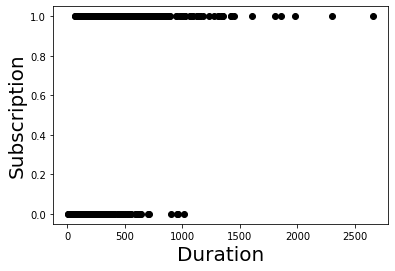

In [12]:
# Create a scatter plot of x1 (Duration, no constant) and y (Subscribed)
plt.scatter(x1,y,c='black')
# Don't forget to label your axes!
plt.xlabel('Duration', fontsize = 20)
plt.ylabel('Subscription', fontsize = 20)
plt.show()

### Find the odds of duration

Recall for the Logit function:\
$\log(\text{odds}) = b_0 + b_1x_1 + ...$\
and\
$\Delta\text{odds} = e^{b_i*\Delta x_i}$

In [17]:
dur_co = results.params['duration']
dodds1 = np.exp(dur_co)
dodds30 = np.exp(dur_co * 30)
dodds365 = np.exp(dur_co * 365)

print(dodds1, dodds30, dodds365, sep='\n')

# Odds about the same after one day
# 117% more likely to subscribe a deposit after about a month
# 656% more likely to subscribe a deposit after a year

1.0051253082618845
1.1657522156038322
6.462135140704951
